8461.949562575493

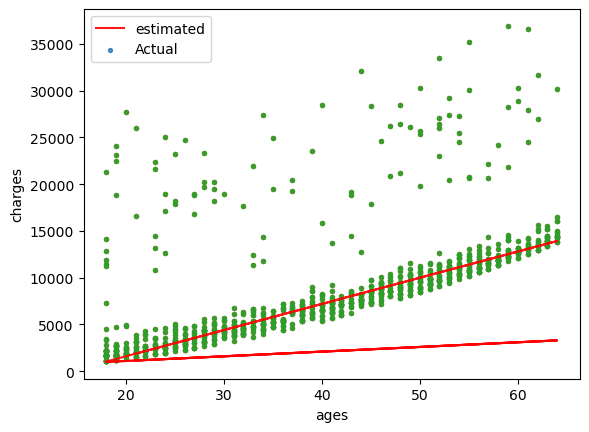

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

medical_df = pd.read_csv('medical.csv')
non_smokers_df = medical_df[medical_df.smoker == 'no']

def estimate_charges(w, age, b):
    return w * age + b

w = 50
b = 100

# ❌ Wrong order before: estimate_charges(30, w, b)
# ✅ Correct order:
estimate_charges(w, 30, b)

ages = non_smokers_df.age
estimated_charges = estimate_charges(w, ages, b)
target = non_smokers_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Ages')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])

non_smokers_df = medical_df[medical_df.smoker == 'no']

def try_parameters(w, b):
    ages = non_smokers_df.age
    target = non_smokers_df.charges
    estimated_charges = estimate_charges(w, ages, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.9)
    plt.xlabel('ages')
    plt.ylabel('charges')
    plt.legend(['estimated', 'Actual'])

# try_parameters(60, 200)
try_parameters(280, -4000)

predictions = estimated_charges  # keeps last estimated values

def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

w = 50
b = 100
try_parameters(w, b)

targets=non_smokers_df['charges']
predictions=estimate_charges(w,non_smokers_df.age,b)
float(rmse(targets,predictions))




RMSE LOSS 4725.9133994520325


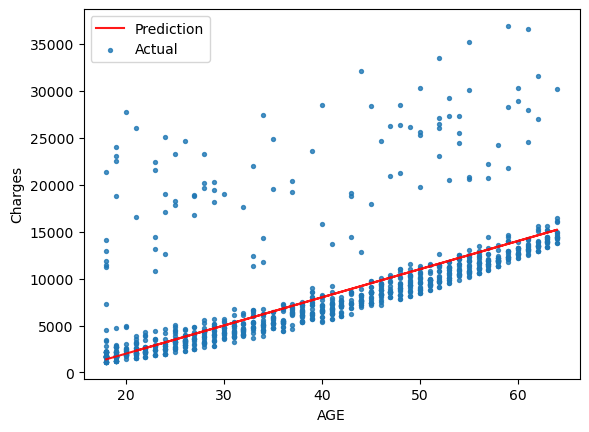

In [5]:
def try_parameters(w,b):
    ages=non_smokers_df.age
    target=non_smokers_df.charges
    predictions=estimate_charges(ages,w,b)

    plt.plot(ages,predictions,'r',alpha=0.9);
    plt.scatter(ages,target,s=8,alpha=0.8);
    plt.xlabel('AGE');
    plt.ylabel('Charges');
    plt.legend(['Prediction','Actual']);

    loss=rmse(target,predictions)
    print("RMSE LOSS",loss)

try_parameters(300,-4000)


In [4]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
help(model.fit)
inputs=non_smokers_df[['age']]
targets=non_smokers_df.charges
print('input.shape :',inputs.shape)
print('targets.shape :',targets.shape)
model.fit(inputs,targets)
model.predict(np.array([[23],
                        [37],
                        [61]]))
predictions=model.predict(inputs)
predictions 
rmse(targets,predictions)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.

input.shape : (1064, 1)
targets.shape : (1064,)


C:\Users\PMLS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(4662.505766636395)

In [5]:
#w
model.coef_

array([267.24891283])

In [14]:
#b
model.intercept_

np.float64(-2091.4205565650827)

In [7]:
inputs,target=non_smokers_df[['age']],non_smokers_df['charges']
model=LinearRegression().fit(inputs,target)
predictions=model.predict(inputs)
loss=rmse(targets,predictions)
print('Loss :',loss)

Loss : 4662.505766636395
